# M3 N1 Introduction to pandas and cloud based data

In this notebook, we'll wrangle some cloud-hosted data with `pandas`, and introduce some of the methods you'll use in Module 3's homework.

You'll may to install a few new packages for this assignment, so be sure to install them in the class conda environment, which is `xarray-climate` for most users.

All right, for this notebook, and for your assignment, we'll be using the NOAA Global Historical Climatology Network Daily (GHCN-D) database, which is the official record for daily weather observations.  The dataset is produced by the National Centers for Environmental Information https://doi.org/10.7289/V5D21VHZ.  As part of the NOAA Big Data project, this dataset is hosted in the cloud by several popular cloud data services. For this assignment, we'll use the service on Amazon Web Services, who hosts the dataset in an S3 bucket in a few formats. The link to the S3 page for GHCN-D is https://registry.opendata.aws/noaa-ghcn/.

The data is produced in its original format in fixed-width format text files.  We'll use `pandas` to load some metadata - the station inventory file.

In [1]:
import pandas as pd

stn_ids = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-stations.txt', header=None, infer_nrows=1000)
stn_ids.columns = ['ID','LAT','LON','ELEV','UKN','NAME','GSN','WBAN']
stn_ids

,ID,LAT,LON,ELEV,UKN,NAME,GSN,WBAN
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,41217.0
...,...,...,...,...,...,...,...,...
129653,ZI000067969,-21.0500,29.3670,861.0,NaN,WEST NICHOLSON,NaN,67969.0
129654,ZI000067975,-20.0670,30.8670,1095.0,NaN,MASVINGO,NaN,67975.0
129655,ZI000067977,-21.0170,31.5830,430.0,NaN,BUFFALO RANGE,NaN,67977.0
129656,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0


The next file we'll open is the station inventory file.  It describes for each site and each variable, the years that each variable is available.

In [2]:
periods = pd.read_fwf('http://noaa-ghcn-pds.s3.amazonaws.com/ghcnd-inventory.txt', header=None, infer_nrows=1000)
periods.columns = ['ID','LAT','LON','ELEM','TiMIN','TiMAX']
periods

,ID,LAT,LON,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949
...,...,...,...,...,...,...
767053,ZI000067983,-20.2000,32.6160,PRCP,1951,2025
767054,ZI000067983,-20.2000,32.6160,TAVG,1962,2025
767055,ZI000067991,-22.2170,30.0000,TMAX,1951,1990
767056,ZI000067991,-22.2170,30.0000,TMIN,1951,1990


Let's use `pandas` to merge these two tables into one based on the ID.

In [3]:
merged_stns = pd.merge(stn_ids,periods,how='left',left_on='ID',right_on='ID')
merged_stns

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMAX,1949.0,1949.0
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,TMIN,1949.0,1949.0
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,PRCP,1949.0,1949.0
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNOW,1949.0,1949.0
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,17.1167,-61.7833,SNWD,1949.0,1949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767089,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,PRCP,1951.0,2025.0
767090,ZI000067983,-20.2000,32.6160,1132.0,NaN,CHIPINGE,GSN,67983.0,-20.2000,32.6160,TAVG,1962.0,2025.0
767091,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMAX,1951.0,1990.0
767092,ZI000067991,-22.2170,30.0000,457.0,NaN,BEITBRIDGE,NaN,67991.0,-22.2170,30.0000,TMIN,1951.0,1990.0


Let's filter the merged table just for the `TMAX` element, and those stations still reporting in 2025.  Notice how the number of stations drops - most of the stations in the dataset measure rainfall & many stations have stopped reporting.

In [4]:
#subset for T
merged_stns = merged_stns[(merged_stns['ELEM'] == 'TMAX') & (merged_stns['TiMAX'] == 2025)]
merged_stns


,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
18,AE000041196,25.3330,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,41196.0,25.3330,55.517,TMAX,1944.0,2025.0
22,AEM00041194,25.2550,55.364,10.4,NaN,DUBAI INTL,NaN,41194.0,25.2550,55.364,TMAX,1983.0,2025.0
26,AEM00041217,24.4330,54.651,26.8,NaN,ABU DHABI INTL,NaN,41217.0,24.4330,54.651,TMAX,1983.0,2025.0
30,AEM00041218,24.2620,55.609,264.9,NaN,AL AIN INTL,NaN,41218.0,24.2620,55.609,TMAX,1994.0,2025.0
54,AG000060390,36.7167,3.250,24.0,NaN,ALGER-DAR EL BEIDA,GSN,60390.0,36.7167,3.250,TMAX,1940.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767021,ZA000067743,-17.8170,25.817,986.0,NaN,LIVINGSTONE,GSN,67743.0,-17.8170,25.817,TMAX,1973.0,2025.0
767026,ZAM00067663,-14.4500,28.467,1207.0,NaN,KABWE/MILLIKEN,NaN,67663.0,-14.4500,28.467,TMAX,1973.0,2025.0
767038,ZI000067775,-17.9170,31.133,1480.0,NaN,HARARE (KUTSAGA),GSN,67775.0,-17.9170,31.133,TMAX,1956.0,2025.0
767079,ZI000067975,-20.0670,30.867,1095.0,NaN,MASVINGO,NaN,67975.0,-20.0670,30.867,TMAX,1951.0,2025.0


Let's visualize where these currently reporting stations are using a map, depending on when they started taking measurements.  We'll sort them so the oldest ones are last, so they plot on the top of the map.

In [5]:
merged_stns_sorted = merged_stns.sort_values('TiMIN', ascending=False)

In [6]:
merged_stns_sorted

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
624524,USC00364571,41.8422,-79.0169,384.0,PA,KINZUA DAM,NaN,NaN,41.8422,-79.0169,TMAX,2025.0,2025.0
631875,USC00388473,35.0644,-82.6722,384.0,SC,TABLE ROCK RSVR,NaN,NaN,35.0644,-82.6722,TMAX,2025.0,2025.0
488784,USC00126988,41.5919,-85.1017,324.9,IN,PLEASANT LAKE 4NW,NaN,NaN,41.5919,-85.1017,TMAX,2025.0,2025.0
136625,IN009040100,17.9170,77.5330,664.0,NaN,BIDAR,NaN,43125.0,17.9170,77.5330,TMAX,2025.0,2025.0
136632,IN009050100,16.8170,75.7170,594.0,NaN,BIJAPUR,NaN,43161.0,16.8170,75.7170,TMAX,2025.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180323,UK000047811,54.3500,-6.6500,62.0,NaN,ARMAGH,NaN,NaN,54.3500,-6.6500,TMAX,1844.0,2025.0
734417,USW00014734,40.6828,-74.1692,1.8,NJ,NEWARK LIBERTY INTL AP,NaN,72502.0,40.6828,-74.1692,TMAX,1843.0,2025.0
63013,BE000006447,50.8000,4.3500,104.0,NaN,UCCLE,GSN,6447.0,50.8000,4.3500,TMAX,1833.0,2025.0
129320,GM000004204,50.9267,11.5842,155.0,NaN,JENA STERNWARTE,NaN,NaN,50.9267,11.5842,TMAX,1824.0,2025.0


Let's do a scatter plot on a `cartopy` map.

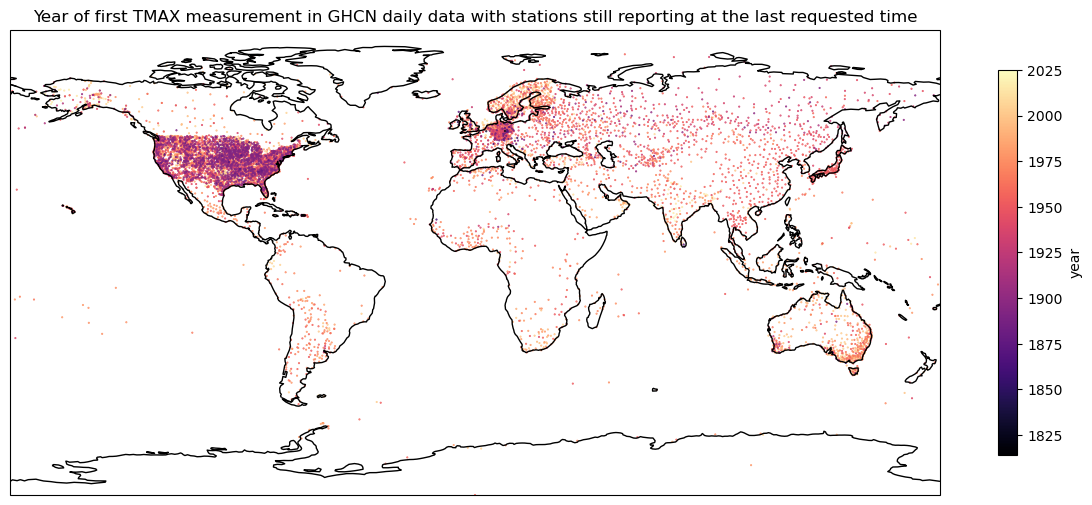

In [7]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()
ax.coastlines()

plt.scatter(merged_stns_sorted['LON_x'],merged_stns_sorted['LAT_x'],0.25,c=merged_stns_sorted['TiMIN'], 
            transform=ccrs.PlateCarree(), cmap='magma')
plt.colorbar(shrink = 0.5, label='year')
plt.title('Year of first TMAX measurement in GHCN daily data with stations still reporting at the last requested time');

Let's do a query to find stations that are reporting in 2025 and contain the string 'TULSA' the station name field.

In [8]:
merged_stns[merged_stns['NAME'].str.contains('TULSA', regex=False)]

,ID,LAT_x,LON_x,ELEV,UKN,NAME,GSN,WBAN,LAT_y,LON_y,ELEM,TiMIN,TiMAX
732384,USW00013968,36.1986,-95.8783,194.8,OK,TULSA INTL AP,NaN,72356.0,36.1986,-95.8783,TMAX,1938.0,2025.0
753626,USW00053908,36.0425,-95.9903,189.0,OK,TULSA RICHARD L JONES JR AP,NaN,NaN,36.0425,-95.9903,TMAX,1998.0,2025.0


Let's load the data! The data is avaiable in AWS in a couple of formats.  It has a mirror of the raw data format in column separated values (csv), and pandas can read it without a problem.  I've added a couple of flags to avoid errors, but this should work to open the data in this format.

Again, to learn more, visit the AWS site for GHCN-D (https://registry.opendata.aws/noaa-ghcn/)

Let's load 

In [9]:
df = pd.read_csv(
...      "s3://noaa-ghcn-pds/csv/by_station/USC00118740.csv",
...      storage_options={"anon": True},  # passed to `s3fs.S3FileSystem`
         dtype={'Q_FLAG': 'object', 'M_FLAG': 'object'},
         parse_dates=['DATE']
... ).set_index('DATE')

/tmp/ipykernel_1649/1750304561.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Looking at the structure of the data, each "element" takes up one line, there are QC flags for each variables, and other informtion.

In [10]:
df

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
DATE,,,,,,,
1902-08-01,USC00118740,TMAX,300,NaN,NaN,6,NaN
1902-08-02,USC00118740,TMAX,322,NaN,NaN,6,NaN
1902-08-03,USC00118740,TMAX,322,NaN,NaN,6,NaN
1902-08-04,USC00118740,TMAX,256,NaN,NaN,6,NaN
1902-08-05,USC00118740,TMAX,289,NaN,NaN,6,NaN
...,...,...,...,...,...,...,...
2025-10-01,USC00118740,PRCP,0,NaN,NaN,N,800.0
2025-10-01,USC00118740,SNOW,0,NaN,NaN,N,NaN
2025-10-01,USC00118740,SNWD,0,NaN,NaN,N,800.0


We can also load the data in a parquet format, which is a cloud-optimized database format.  It also works well with `dask`.  We won't use `dask` for this exercise because a single site is a small file.  However, if you were interested in looking at larger portions of the dataset, `dask` could help.

In [11]:
from datetime import datetime

df = pd.read_parquet(
    "s3://noaa-ghcn-pds/parquet/by_station/STATION=USC00118740/",
    storage_options={"anon": True},  # passed to `s3fs.S3FileSystem`
)

In [12]:
#make date the index
df['DATE'] = pd.to_datetime(df['DATE'].apply(lambda x: datetime.strptime(x, '%Y%m%d')))
df = df.set_index('DATE').sort_index()  #we need to sort by time because the files are sorted to be arbitrary
df


,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
DATE,,,,,,,
1902-08-01,USC00118740,0,P,None,6,None,PRCP
1902-08-01,USC00118740,167,None,None,6,None,TMIN
1902-08-01,USC00118740,300,None,None,6,None,TMAX
1902-08-02,USC00118740,0,P,None,6,None,PRCP
1902-08-02,USC00118740,183,None,None,6,None,TMIN
...,...,...,...,...,...,...,...
2025-10-01,USC00118740,144,None,None,H,0800,TMIN
2025-10-01,USC00118740,0,None,None,N,0800,WESD
2025-10-01,USC00118740,161,None,None,H,0800,TOBS


Let's create separate dataframes for elements of interest: Maximum and Minimum Temperature and Precipitaion.

In [13]:
df_tmax = df.loc[df['ELEMENT'] == 'TMAX']
df_tmin = df.loc[df['ELEMENT'] == 'TMIN']
df_prcp = df.loc[df['ELEMENT'] == 'PRCP']

In [14]:
df_tmax

,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
DATE,,,,,,,
1902-08-01,USC00118740,300,None,None,6,None,TMAX
1902-08-02,USC00118740,322,None,None,6,None,TMAX
1902-08-03,USC00118740,322,None,None,6,None,TMAX
1902-08-04,USC00118740,256,None,None,6,None,TMAX
1902-08-05,USC00118740,289,None,None,6,None,TMAX
...,...,...,...,...,...,...,...
2025-09-27,USC00118740,289,None,None,H,0800,TMAX
2025-09-28,USC00118740,317,None,None,H,0800,TMAX
2025-09-29,USC00118740,322,None,None,H,0800,TMAX


Note that the values are a not a magnitude you might expect - they are scaled integers.  To get values in degrees C, divide the values by 10.

## pandas plotting

So, let's visualize this data using `matplotlib`. 

In [15]:
%matplotlib inline

Ok, let's plot the time series of maximum temperature for the station we loaded above.  We'll add a fancy rangetool to show the data.

In [16]:
df_tmax

,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
DATE,,,,,,,
1902-08-01,USC00118740,300,None,None,6,None,TMAX
1902-08-02,USC00118740,322,None,None,6,None,TMAX
1902-08-03,USC00118740,322,None,None,6,None,TMAX
1902-08-04,USC00118740,256,None,None,6,None,TMAX
1902-08-05,USC00118740,289,None,None,6,None,TMAX
...,...,...,...,...,...,...,...
2025-09-27,USC00118740,289,None,None,H,0800,TMAX
2025-09-28,USC00118740,317,None,None,H,0800,TMAX
2025-09-29,USC00118740,322,None,None,H,0800,TMAX


We'll use the builtin plotting capability of pandas to create a plot.  Since the index is set to the date and it is a datetime object, we can just plot away.  We can't forget to scale the data!

<Axes: xlabel='DATE'>

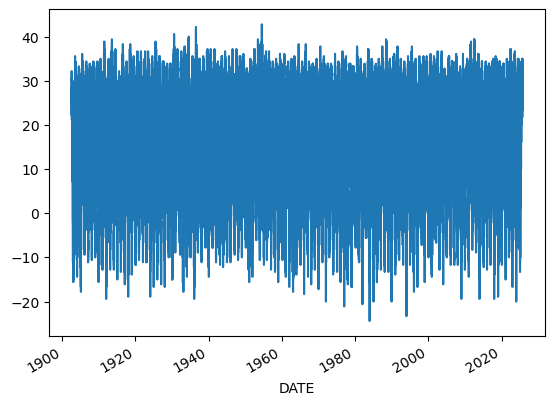

In [17]:
(df_tmax['DATA_VALUE']/10.).plot()

Let's create an annual mean minimum temperature time series using `pandas` groupby.  For convenience, I am going to drop the leap year observations first.

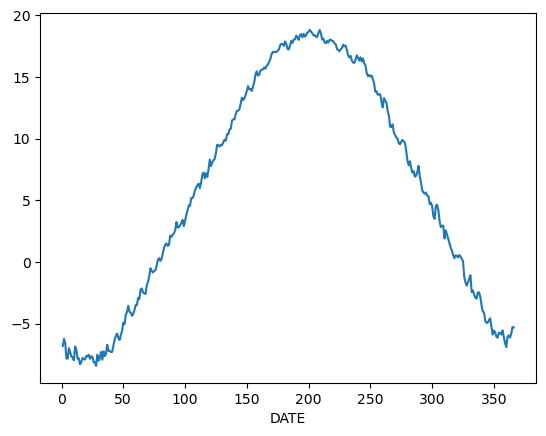

In [27]:
ser=df_tmin[~((df_tmin.index.month==2)&(df_tmin.index.day==29))]

bk_bar1 = (ser['DATA_VALUE']/10.).groupby(ser.index.day_of_year).mean().plot()


It's easy to create basing plots using `pandas_bokeh`, but you can also using the `bokeh` interface to make plots similar to a matplotlib-type plot.  Here, let's show the maximum temperatures for 2022.

<Axes: xlabel='DATE'>

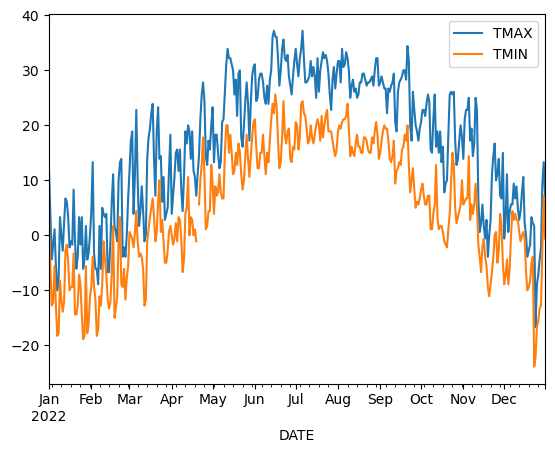

In [ ]:
df_2022 = df_tmax[(df_tmax.index >= pd.to_datetime('2022-01-01'))
 & (df_tmax.index <= pd.to_datetime('2022-12-31'))]

df_2_2022 = df_tmin[(df_tmin.index >= pd.to_datetime('2022-01-01')) 
& (df_tmin.index <= pd.to_datetime('2022-12-31'))]

df_extremes=pd.DataFrame({'TMAX':df_2022['DATA_VALUE']/10.,'TMIN':df_2_2022['DATA_VALUE']/10.},
    index=df_2022.index)

df_extremes.plot()

Let's make a histogram of low temperatures

In [46]:
import numpy as np
arr_hist, edges = np.histogram(df_tmin['DATA_VALUE'][(df_tmin.index >= '1991-01-01') & (df_tmin.index < '2020-01-01')]/10., 
                               bins = np.arange(-40,47,2.5), density=True)
# Put the information in a dataframe
temps = pd.DataFrame({'hist': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

arr_hist, edges = np.histogram(df_tmin['DATA_VALUE'][(df_tmin.index >= '1901-01-01') & (df_tmin.index < '1930-01-01')]/10., 
                               bins = np.arange(-40,47,2.5), density=True)
# Put the information in a dataframe
temps2 = pd.DataFrame({'hist': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})

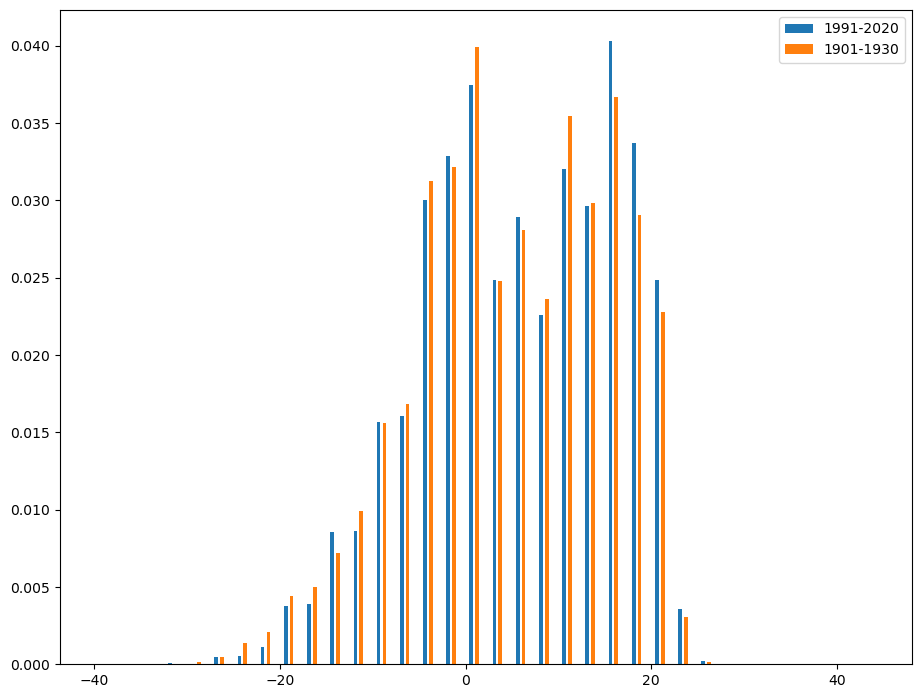

In [61]:
plt.figure(figsize=(11,8.5))

plt.bar(temps['left'].values+(temps['right'].values-temps['left'].values)/4.,temps['hist'].values, width=.4, label='1991-2020')
plt.bar(temps2['left'].values+(temps2['right'].values-temps2['left'].values)/2.,temps2['hist'].values, width=.4, label='1901-1930')
plt.legend()

In [18]:
df_tulsa = pd.read_csv(
...      "s3://noaa-ghcn-pds/csv/by_station/USW00013968.csv",
...      storage_options={"anon": True},  # passed to `s3fs.S3FileSystem`
         dtype={'Q_FLAG': 'object', 'M_FLAG': 'object'},
         parse_dates=['DATE']
... ).set_index('DATE')

In [19]:
df_tulsa

,ID,ELEMENT,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME
DATE,,,,,,,
1938-12-01,USW00013968,TMAX,183,NaN,NaN,6,2400.0
1938-12-02,USW00013968,TMAX,222,NaN,NaN,6,2400.0
1938-12-03,USW00013968,TMAX,200,NaN,NaN,6,2400.0
1938-12-04,USW00013968,TMAX,150,NaN,NaN,6,2400.0
1938-12-05,USW00013968,TMAX,133,NaN,NaN,6,2400.0
...,...,...,...,...,...,...,...
2025-02-03,USW00013968,WSF5,130,NaN,NaN,W,NaN
2025-02-04,USW00013968,WSF5,130,NaN,NaN,W,NaN
2025-02-05,USW00013968,WSF5,67,NaN,NaN,W,NaN


In [20]:
df_tul = pd.read_parquet(
    "s3://noaa-ghcn-pds/parquet/by_station/STATION=USW00013968/",
    storage_options={"anon": True},  # passed to `s3fs.S3FileSystem`
)

df_tul

,ID,DATE,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
0,USW00013968,19650101,100,None,None,X,None,ACMH
1,USW00013968,19650102,100,None,None,X,None,ACMH
2,USW00013968,19650103,20,None,None,X,None,ACMH
3,USW00013968,19650104,40,None,None,X,None,ACMH
4,USW00013968,19650105,90,None,None,X,None,ACMH
...,...,...,...,...,...,...,...,...
411979,USW00013968,20031009,1,None,None,X,None,WV03
411980,USW00013968,20031123,1,None,None,X,None,WV03
411981,USW00013968,20031203,1,None,None,X,None,WV03
411982,USW00013968,20040420,1,None,None,X,None,WV03


In [25]:
#make date the index
df_tul['DATE'] = pd.to_datetime(df_tul['DATE'], format = '%Y%m%d')
#.apply(lambda x: datetime.strptime(x, '%Y%m%d')))
df_tul = df_tul.set_index('DATE').sort_index()  #we need to sort by time because the files are sorted to be arbitrary
df_tul



,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
DATE,,,,,,,
1938-12-01,USW00013968,0,None,None,6,2400,PRCP
1938-12-01,USW00013968,0,None,None,6,None,SNWD
1938-12-01,USW00013968,183,None,None,6,2400,TMAX
1938-12-01,USW00013968,0,None,None,6,None,SNOW
1938-12-01,USW00013968,122,None,None,6,2400,TOBS
...,...,...,...,...,...,...,...
2025-02-06,USW00013968,0,None,None,D,None,SNOW
2025-02-06,USW00013968,0,T,None,D,2400,PRCP
2025-02-06,USW00013968,0,None,None,D,2400,SNWD


In [27]:
df_tul_tmax = df.loc[df['ELEMENT'] == 'TMAX']
df_tul_tmin = df.loc[df['ELEMENT'] == 'TMIN']

df_tul_tmax

,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT
DATE,,,,,,,
1902-08-01,USC00118740,300,None,None,6,None,TMAX
1902-08-02,USC00118740,322,None,None,6,None,TMAX
1902-08-03,USC00118740,322,None,None,6,None,TMAX
1902-08-04,USC00118740,256,None,None,6,None,TMAX
1902-08-05,USC00118740,289,None,None,6,None,TMAX
...,...,...,...,...,...,...,...
2025-09-27,USC00118740,289,None,None,H,0800,TMAX
2025-09-28,USC00118740,317,None,None,H,0800,TMAX
2025-09-29,USC00118740,322,None,None,H,0800,TMAX


In [36]:
df_tul_tmax = df_tul_tmax[
    (df_tul_tmax.index >= pd.to_datetime('1991-01-01')) 
    & (df_tul_tmax.index <= pd.to_datetime('2019-12-31'))]

df_tul_tmax['Values'] = df_tul_tmax['DATA_VALUE']/10

df_tul_tmax

,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT,Values
DATE,,,,,,,,
1991-01-01,USC00118740,-11,None,None,0,2400,TMAX,-1.1
1991-01-02,USC00118740,-22,None,None,0,2400,TMAX,-2.2
1991-01-03,USC00118740,-83,None,None,0,2400,TMAX,-8.3
1991-01-04,USC00118740,-33,None,None,0,2400,TMAX,-3.3
1991-01-05,USC00118740,6,None,None,0,2400,TMAX,0.6
...,...,...,...,...,...,...,...,...
2019-12-27,USC00118740,78,None,None,7,2400,TMAX,7.8
2019-12-28,USC00118740,133,None,None,7,2400,TMAX,13.3
2019-12-29,USC00118740,150,None,None,7,2400,TMAX,15.0


In [35]:
df_tul_tmin = df_tul_tmin[
    (df_tul_tmin.index >= pd.to_datetime('1991-01-01')) 
    & (df_tul_tmin.index <= pd.to_datetime('2019-12-31'))]


df_tul_tmin['Values'] = df_tul_tmin['DATA_VALUE']/10

df_tul_tmin

,ID,DATA_VALUE,M_FLAG,Q_FLAG,S_FLAG,OBS_TIME,ELEMENT,Values
DATE,,,,,,,,
1991-01-01,USC00118740,-106,None,None,0,2400,TMIN,-10.6
1991-01-02,USC00118740,-83,None,None,0,2400,TMIN,-8.3
1991-01-03,USC00118740,-133,None,None,0,2400,TMIN,-13.3
1991-01-04,USC00118740,-128,None,None,0,2400,TMIN,-12.8
1991-01-05,USC00118740,-28,None,I,0,2400,TMIN,-2.8
...,...,...,...,...,...,...,...,...
2019-12-27,USC00118740,6,None,None,7,2400,TMIN,0.6
2019-12-28,USC00118740,0,None,None,7,2400,TMIN,0.0
2019-12-29,USC00118740,44,None,None,7,2400,TMIN,4.4


In [ ]:
# Max, min, and means

max_value = df_tul_tmax['Values'].max()
min_value = df_tul_tmin['Values'].min()

normal_min = df_tul_tmin['Values'].mean().round(2)
normal_max = df_tul_tmax['Values'].mean().round(2)

print('The max temperature for 1991-2020 is', max_value, 'degC')
print('The min temperature for 1991-2020 is', min_value, 'degC')
print('The average daily high temperature for 1991-2020 is', normal_max, 'degC')
print('The average daily low temperature for 1991-2020 is', normal_min, 'degC')

The max temperature for 1991-2020 is 39.4 degC
The min temperature for 1991-2020 is -31.7 degC
The average daily high temperature for 1991-2020 is 16.81 degC
The average daily low temperature for 1991-2020 is 5.86 degC


In [65]:
# Dates of max and min
max_timestamp = df_tul_tmax['Values'].idxmax()
min_timestamp = df_tul_tmin['Values'].idxmin()
print('Max =', max_timestamp, '\n'
'Min =', min_timestamp)

Max = 2012-07-06 00:00:00 
Min = 1994-01-19 00:00:00


In [67]:
min_date = df_tul_tmin.loc[df_tul_tmin['Values'] == df_tul_tmin['Values'].min()]

max_date = df_tul_tmax.loc[df_tul_tmax['Values'] == df_tul_tmax['Values'].max()]

print(min_date)
print(max_date)

                     ID  DATA_VALUE M_FLAG Q_FLAG S_FLAG OBS_TIME ELEMENT  \
DATE                                                                        
1994-01-19  USC00118740        -317   None   None      0     2400    TMIN   
1999-01-05  USC00118740        -317   None   None      0     2400    TMIN   

            Values  
DATE                
1994-01-19   -31.7  
1999-01-05   -31.7  
                     ID  DATA_VALUE M_FLAG Q_FLAG S_FLAG OBS_TIME ELEMENT  \
DATE                                                                        
2012-07-06  USC00118740         394   None   None      7     2400    TMAX   
2012-07-07  USC00118740         394   None   None      7     2400    TMAX   
2012-07-25  USC00118740         394   None   None      7     2400    TMAX   

            Values  
DATE                
2012-07-06    39.4  
2012-07-07    39.4  
2012-07-25    39.4  


In [ ]:
df_2022 = df_tmax[(df_tmax.index >= pd.to_datetime('2022-01-01'))
 & (df_tmax.index <= pd.to_datetime('2022-12-31'))]

df_2_2022 = df_tmin[(df_tmin.index >= pd.to_datetime('2022-01-01')) 
& (df_tmin.index <= pd.to_datetime('2022-12-31'))]

df_extremes=pd.DataFrame({'TMAX':df_2022['DATA_VALUE']/10.,'TMIN':df_2_2022['DATA_VALUE']/10.},
    index=df_2022.index)

df_extremes.plot()

<Axes: xlabel='DATE'>

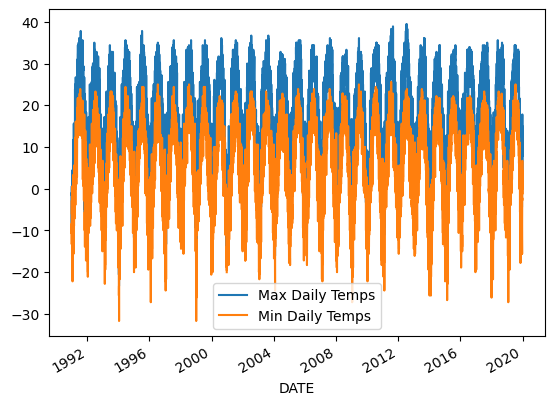

In [69]:
df_tul_plot = pd.DataFrame({'Max Daily Temps': df_tul_tmax['Values'], 
    'Min Daily Temps': df_tul_tmin['Values']}, 
    index = df_tul.index)

df_tul_plot.plot()

/tmp/ipykernel_1649/3119488020.py:11: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(min_date.index,


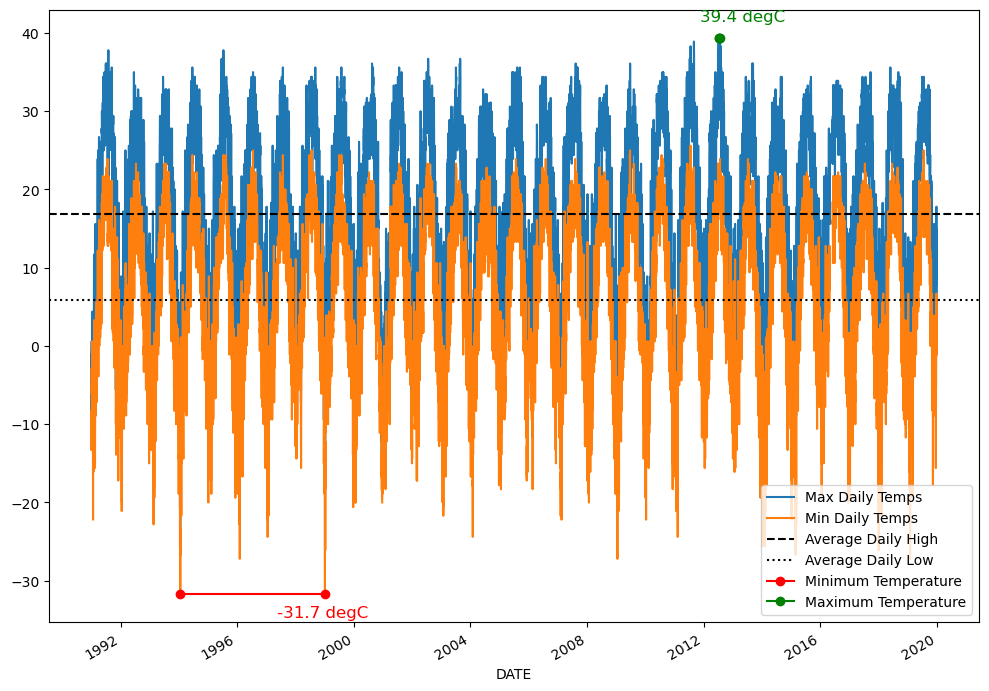

In [109]:
fig, ax = plt.subplots(1,1, figsize = (12,9))

# Daily highs and lows
df_tul_plot.plot(ax = ax)

# Average daily highs and lows
ax.axhline(y = normal_max, c = 'black', label = 'Average Daily High', linestyle = 'dashed')
ax.axhline(y = normal_min, c = 'black', label = 'Average Daily Low', linestyle = 'dotted')

# Max and min values
ax.plot(min_date.index, 
    min_date['Values'].values, 
    marker = 'o', 
    c = 'red', 
    label = 'Minimum Temperature'
    )

ax.plot(max_date.index, 
    max_date['Values'].values, 
    marker = 'o', 
    c = 'green',
    label = 'Maximum Temperature'
    )

ax.text((10000),min_value-3, '-31.7 degC', fontsize = 12, c = 'red')
ax.text((15300), max_value+2.1, '39.4 degC', fontsize = 12, c = 'green')

ax.legend(loc = 'lower right')